# Libraries

In [77]:
import numpy as np
import pandas as pd
import time
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import classification_report

import seaborn as sns
sns.set(style ='whitegrid')
pd.set_option('display.max_columns', None)

# Load the data and analyze

In [78]:
headers = ['ID', 'Entity', 'Sentiment', 'Tweet']

train = pd.read_csv('twitter_training.csv',names=headers)
validation = pd.read_csv('twitter_validation.csv',names=headers)

In [79]:
train.head()

,ID,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [80]:
validation.head()

,ID,Entity,Sentiment,Tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [82]:
train['Sentiment'].value_counts()

Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: Sentiment, dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

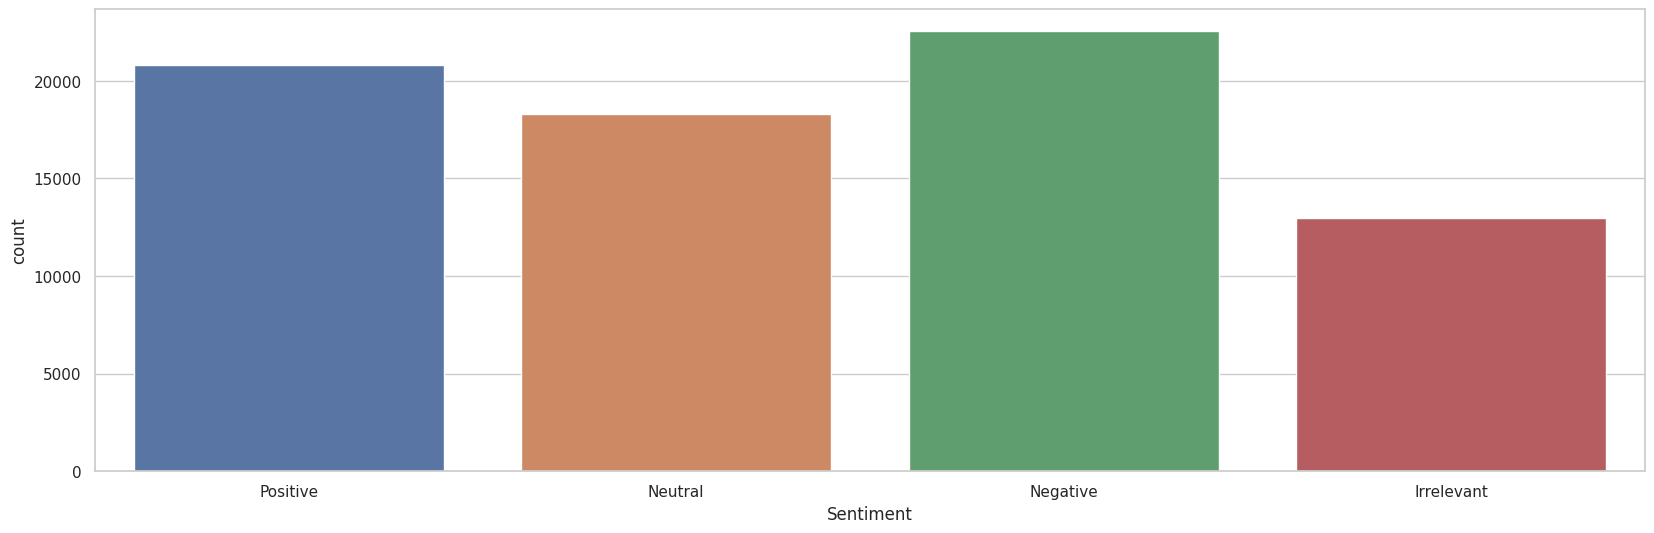

In [83]:
sns.countplot(x=train['Sentiment'])

In [84]:
train.duplicated().sum()

2700

In [85]:
train = train.drop_duplicates()
train.duplicated().sum()

0

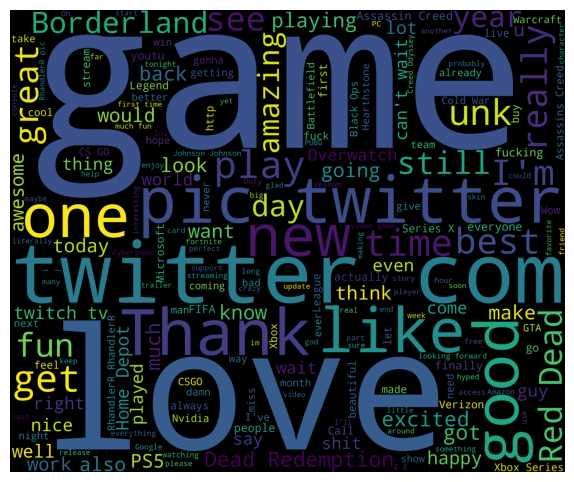

In [86]:
# Filter the training data to keep only positive sentiment tweets
positive_tweets = train[train['Sentiment'] == 'Positive']
words = ' '.join(positive_tweets['Tweet'].astype(str))
cleaned_words = ' '.join([word for word in words.split() if not word.startswith('@')])
wordcloud = WordCloud(
    background_color='black',
    stopwords=stopwords.words('english'),
    width=3000, height=2500
).generate(cleaned_words)

# Show the word cloud visualization
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

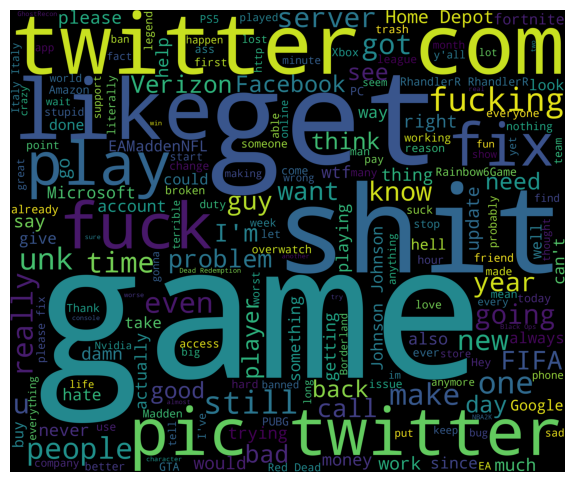

In [87]:
# Filter the training data to keep only negative sentiment tweets
negative_tweets = train[train['Sentiment'] == 'Negative']
words = ' '.join(negative_tweets['Tweet'].astype(str))
cleaned_words = ' '.join([word for word in words.split() if not word.startswith('@')])
wordcloud = WordCloud(
    background_color='black',
    stopwords=stopwords.words('english'),
    width=3000, height=2500
).generate(cleaned_words)

# visualization
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

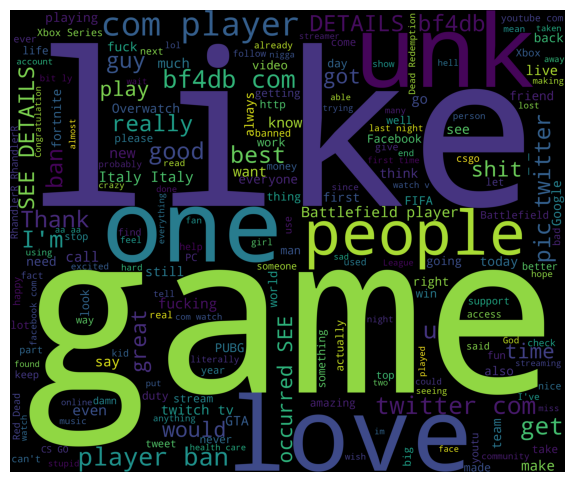

In [88]:
# Filter the training data to keep only irrelevant sentiment tweets
irrelevant_tweets = train[train['Sentiment'] == 'Irrelevant']
words = ' '.join(irrelevant_tweets['Tweet'].astype(str))
cleaned_words = ' '.join([word for word in words.split() if not word.startswith('@')])
wordcloud = WordCloud(
    background_color='black',
    stopwords=stopwords.words('english'),
    width=3000, height=2500
).generate(cleaned_words)

# visualization
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

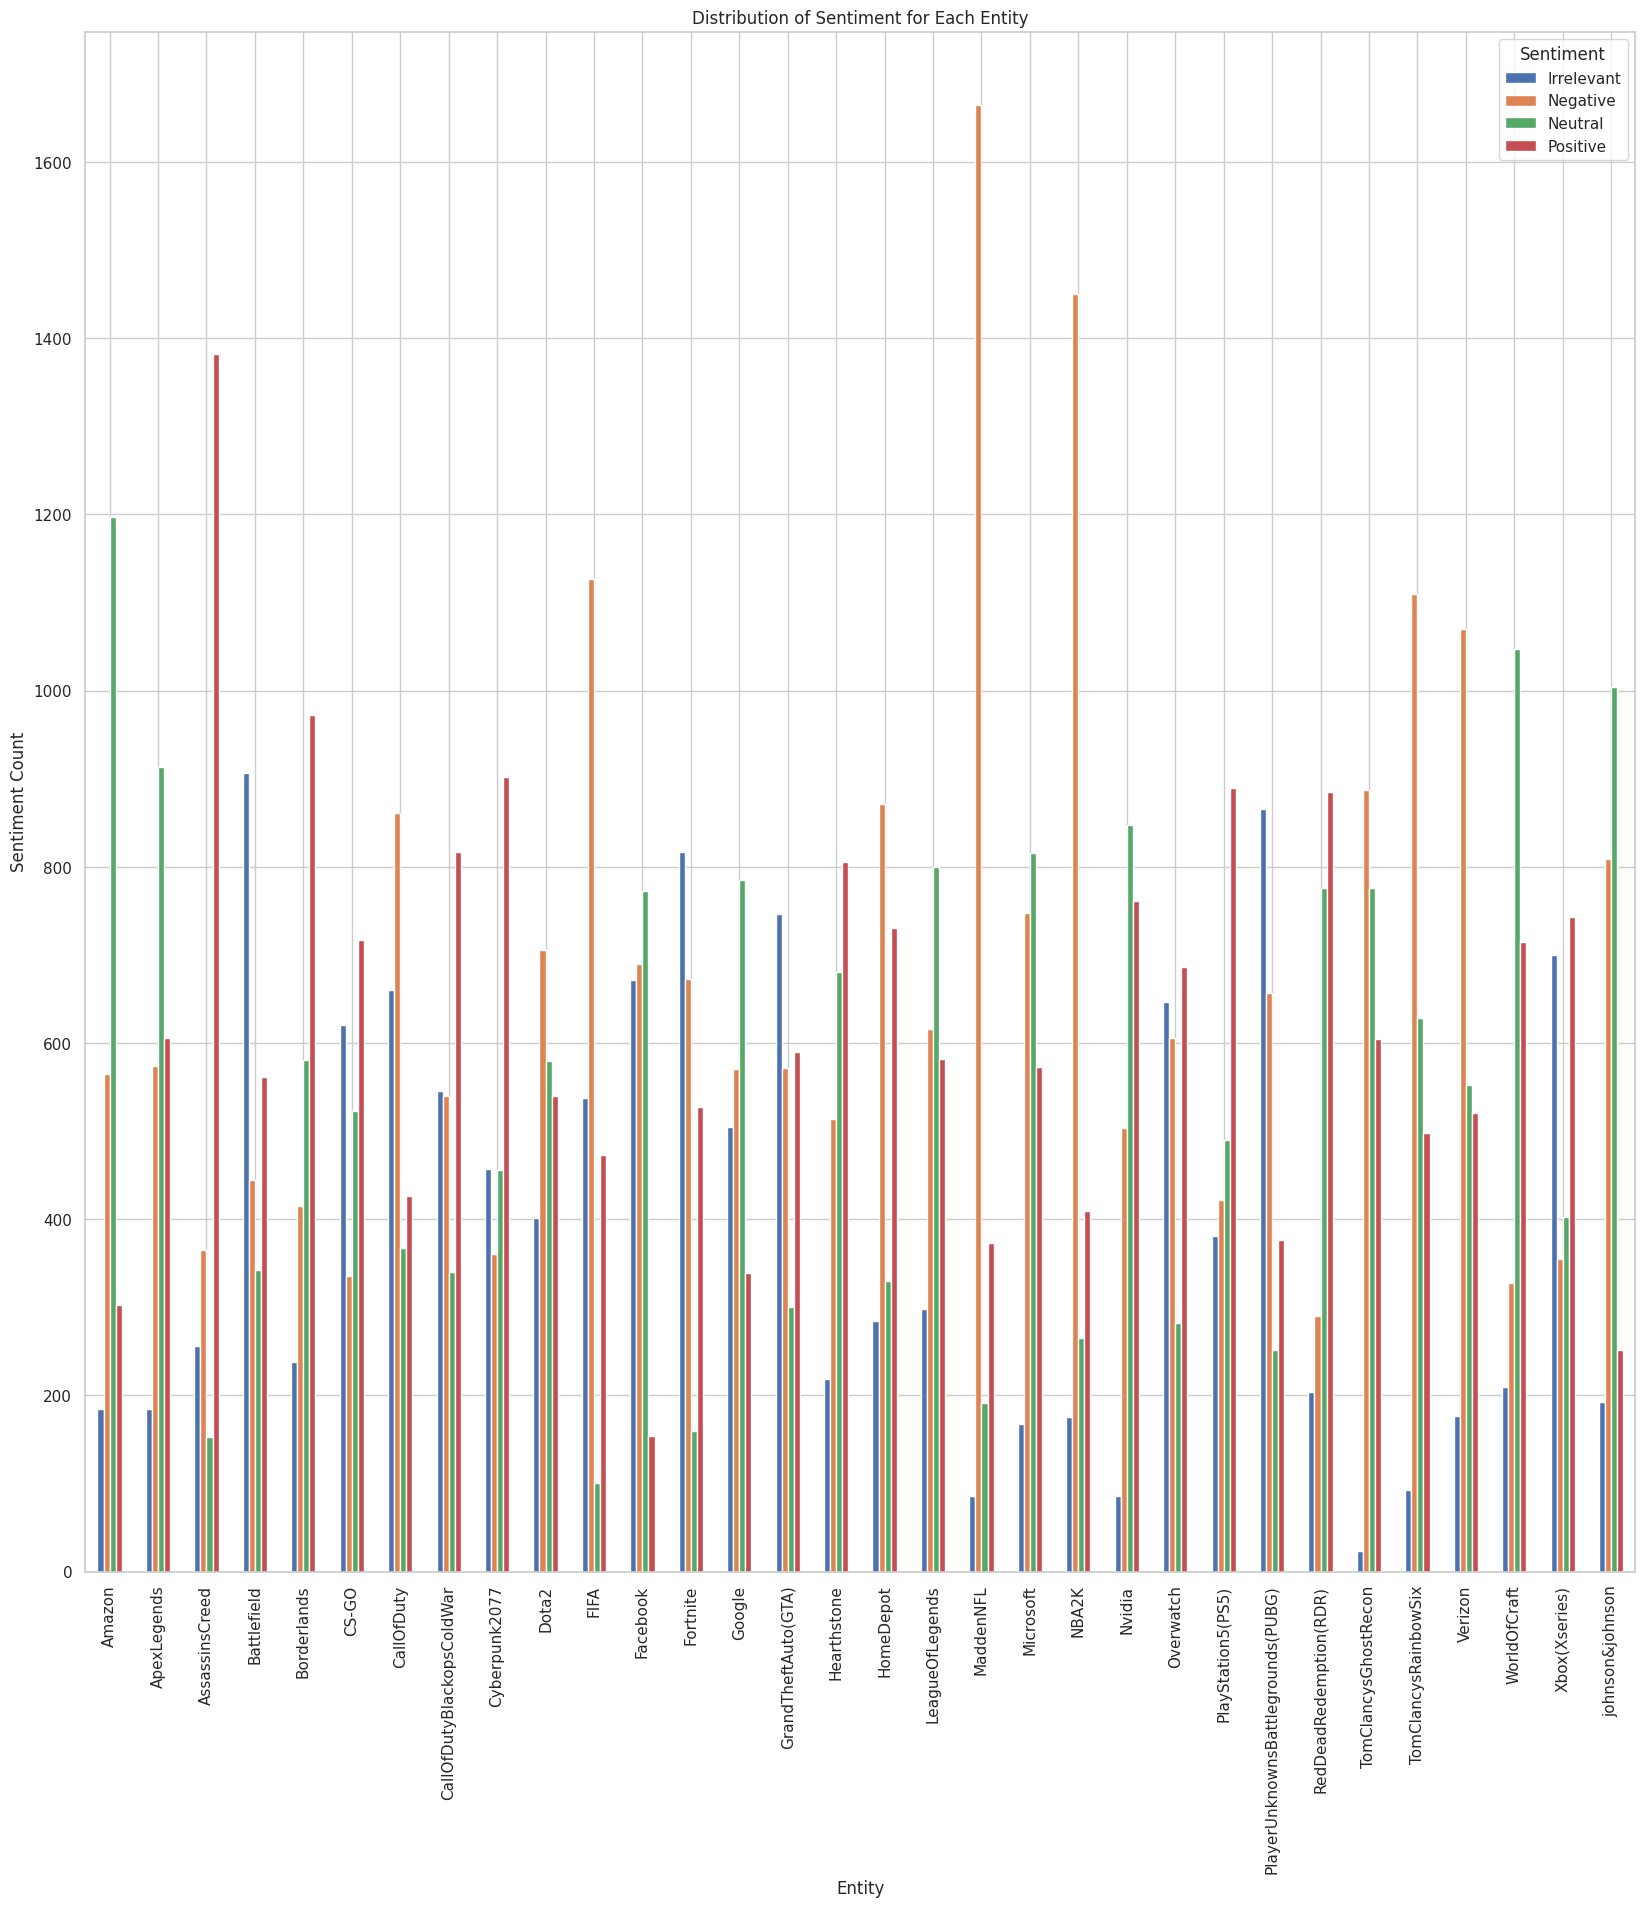

In [89]:
# Create a pivot table of sentiment counts for each entity
sentiment_counts = pd.pivot_table(train, values='Tweet', index='Entity', columns='Sentiment', aggfunc='count')

# Create a bar plot of the sentiment counts for each entity
ax = sentiment_counts.plot(kind='bar', figsize=(20, 20))
ax.set_xlabel('Entity')
ax.set_ylabel('Sentiment Count')
ax.set_title('Distribution of Sentiment for Each Entity')
plt.show()


# Cleaning

In [92]:
# create a copy of the original dataframe
train_encoded = train.copy()

# perform one hot encoding using Pandas get_dummies() function
one_hot = pd.get_dummies(train['Sentiment'])
train_encoded = pd.concat([train_encoded, one_hot], axis=1)
train_encoded = train_encoded.drop('Sentiment', axis=1)

print(train_df_encoded.head())


     ID       Entity Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               Tweet  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [93]:
train['Tweet'].isnull().sum()

326

In [94]:
train.dropna(axis=0, inplace=True)

In [95]:
tweet_train  = train["Tweet"]
tweet_valid=validation["Tweet"]
y=train['Sentiment']

# Further cleaning the tweets

In [96]:
import re
import string
from nltk.stem import SnowballStemmer

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r"http\S+", "", text)
    
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Remove numbers
    text = re.sub(r"\d+", "", text)
    
    # Tokenize words
    words = text.split()
    
    # Remove stop words
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    
    # Stem words
    stemmer = SnowballStemmer("english")
    words = [stemmer.stem(word) for word in words]
    
    # Join words back into a string
    text = " ".join(words)
    
    return text


In [97]:
reviews_train_clean = [preprocess_text(review) for review in tweet_train]
reviews_valid_clean = [preprocess_text(review) for review in tweet_valid]

# Performing TF-IDF

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

# fit and transform the training data
X = tfidf.fit_transform(reviews_train_clean)

# transform the validation data
tfidf_valid = tfidf.transform(reviews_valid_clean)


# Splitting Data

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using RandomForestClassifier Model for the Sentiment analysis

In [101]:
text_classifier = RandomForestClassifier(n_estimators=500, random_state=0)
text_classifier.fit(X_train, y_train)

y_pred=text_classifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.97      0.86      0.91      2529
    Negative       0.94      0.93      0.93      4383
     Neutral       0.92      0.89      0.91      3543
    Positive       0.85      0.94      0.90      3877

    accuracy                           0.91     14332
   macro avg       0.92      0.91      0.91     14332
weighted avg       0.92      0.91      0.91     14332

